In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)


In [23]:
df = pd.read_csv('penguins.csv')
df.sample(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
97,40.3,18.5,196.0,4350.0,MALE
160,46.0,18.9,195.0,4150.0,FEMALE
24,38.8,17.2,180.0,3800.0,MALE
85,41.3,20.3,194.0,3550.0,MALE
98,33.1,16.1,178.0,2900.0,FEMALE


In [24]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
10%,36.600000,14.300000,185.000000,3300.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
90%,50.800000,19.500000,221.000000,5400.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [26]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [27]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

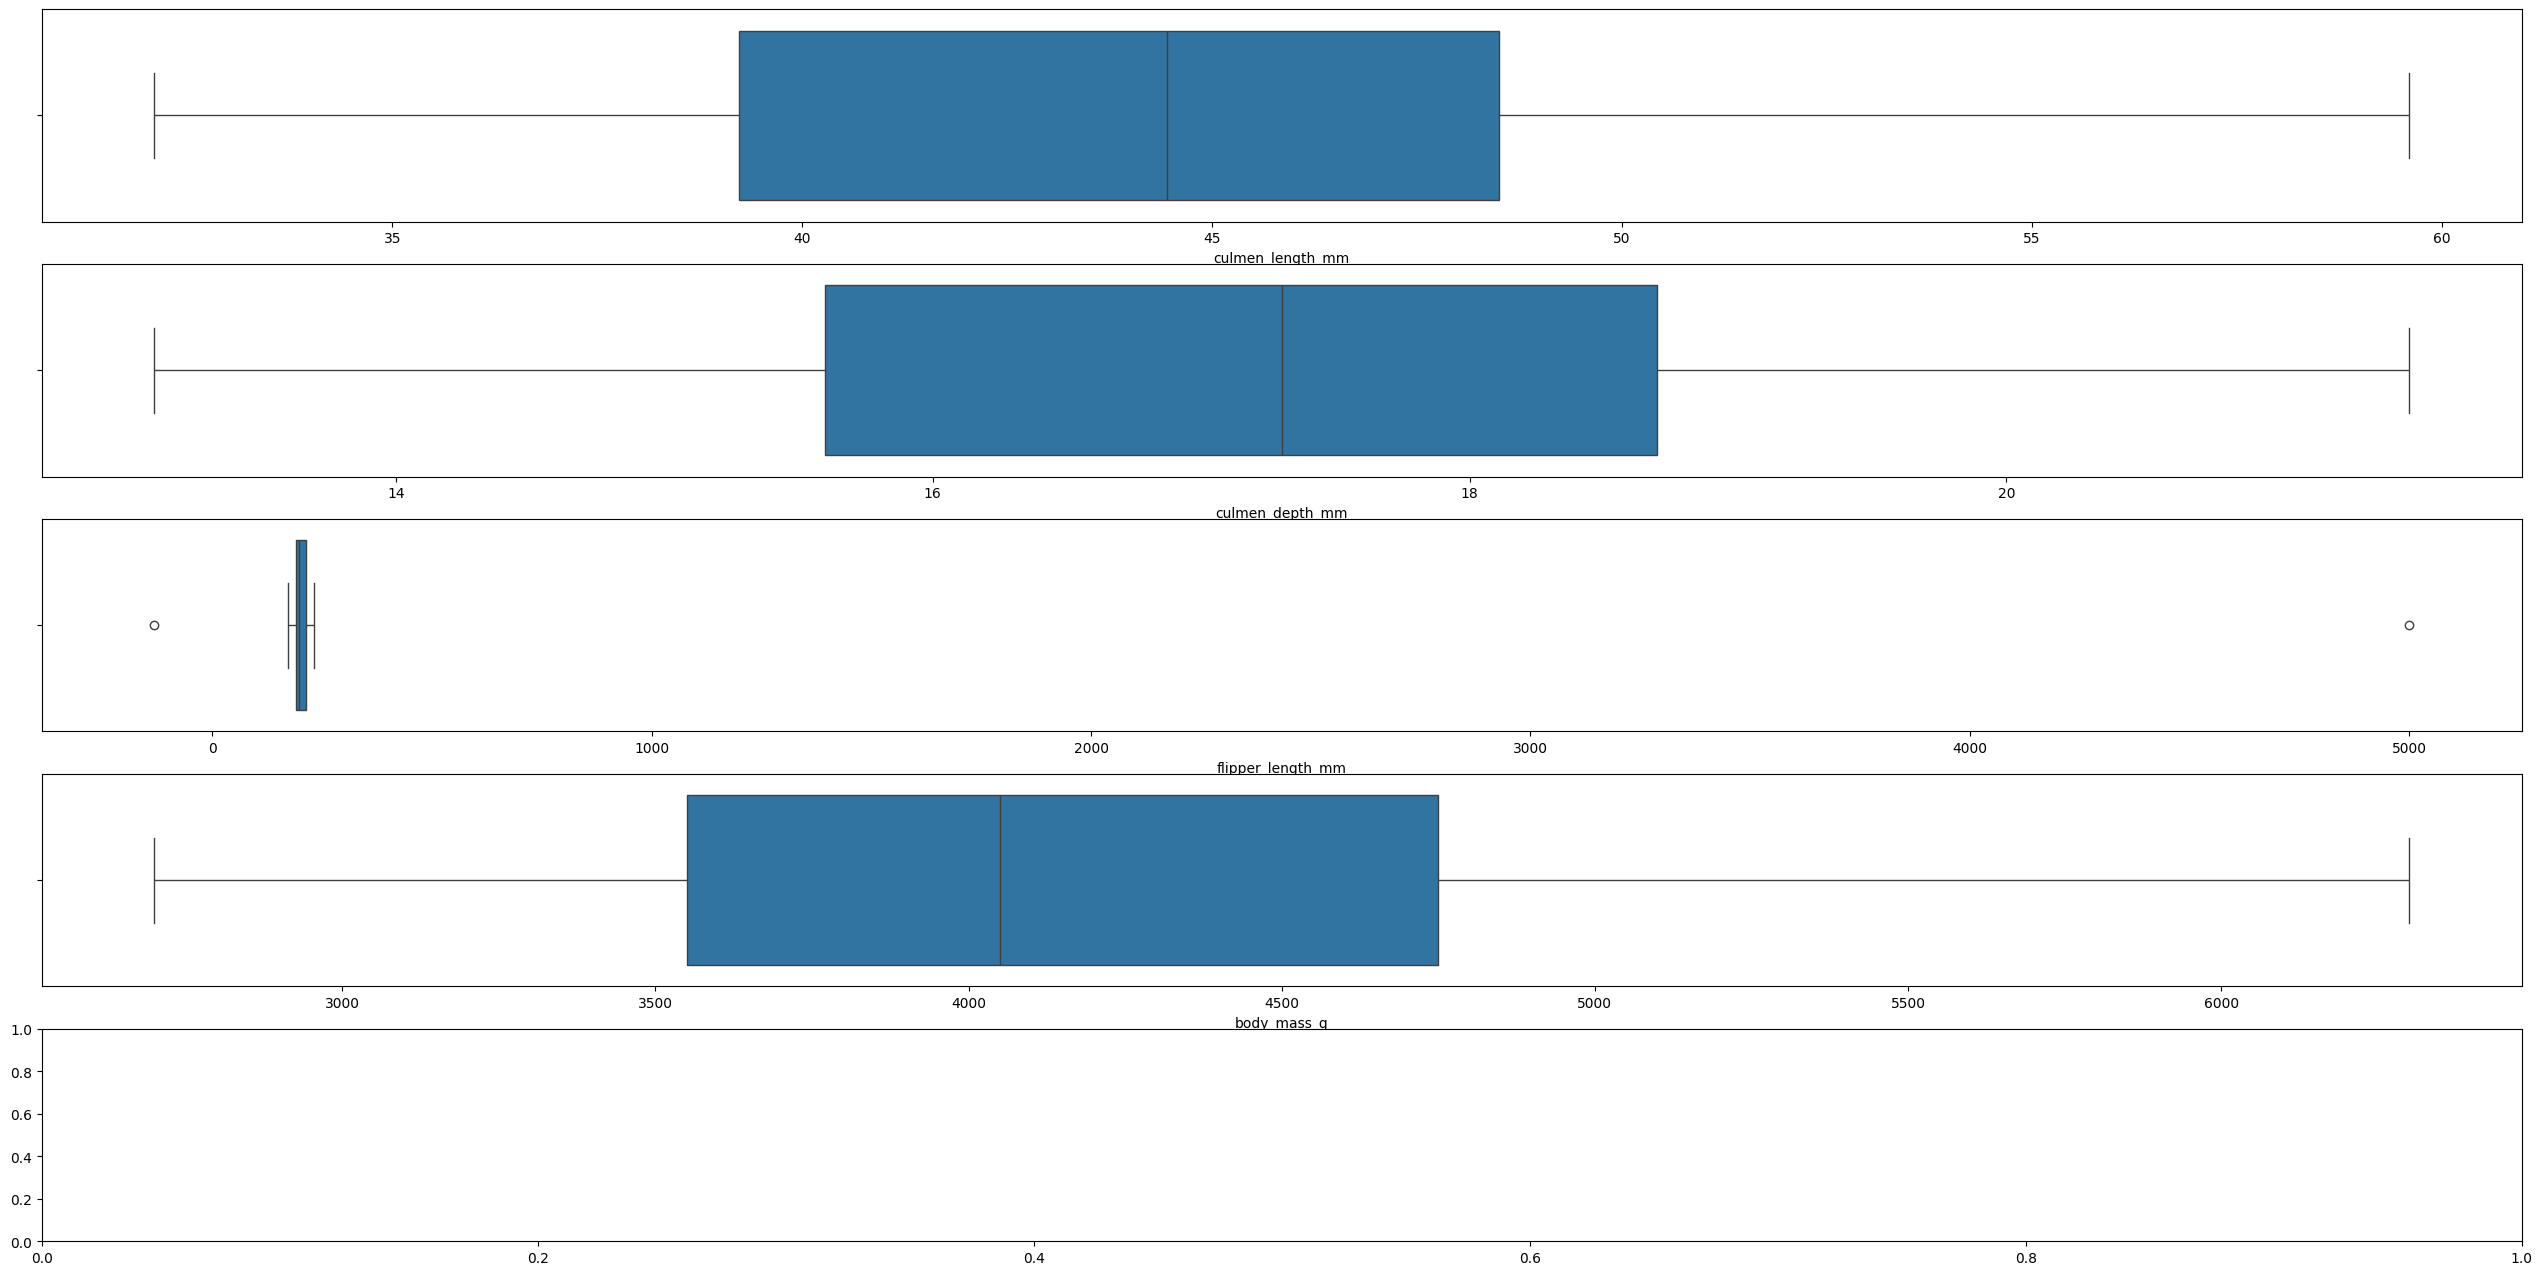

In [28]:
df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.boxplot(data=df_num, x=col, ax=axes[idx % 5])

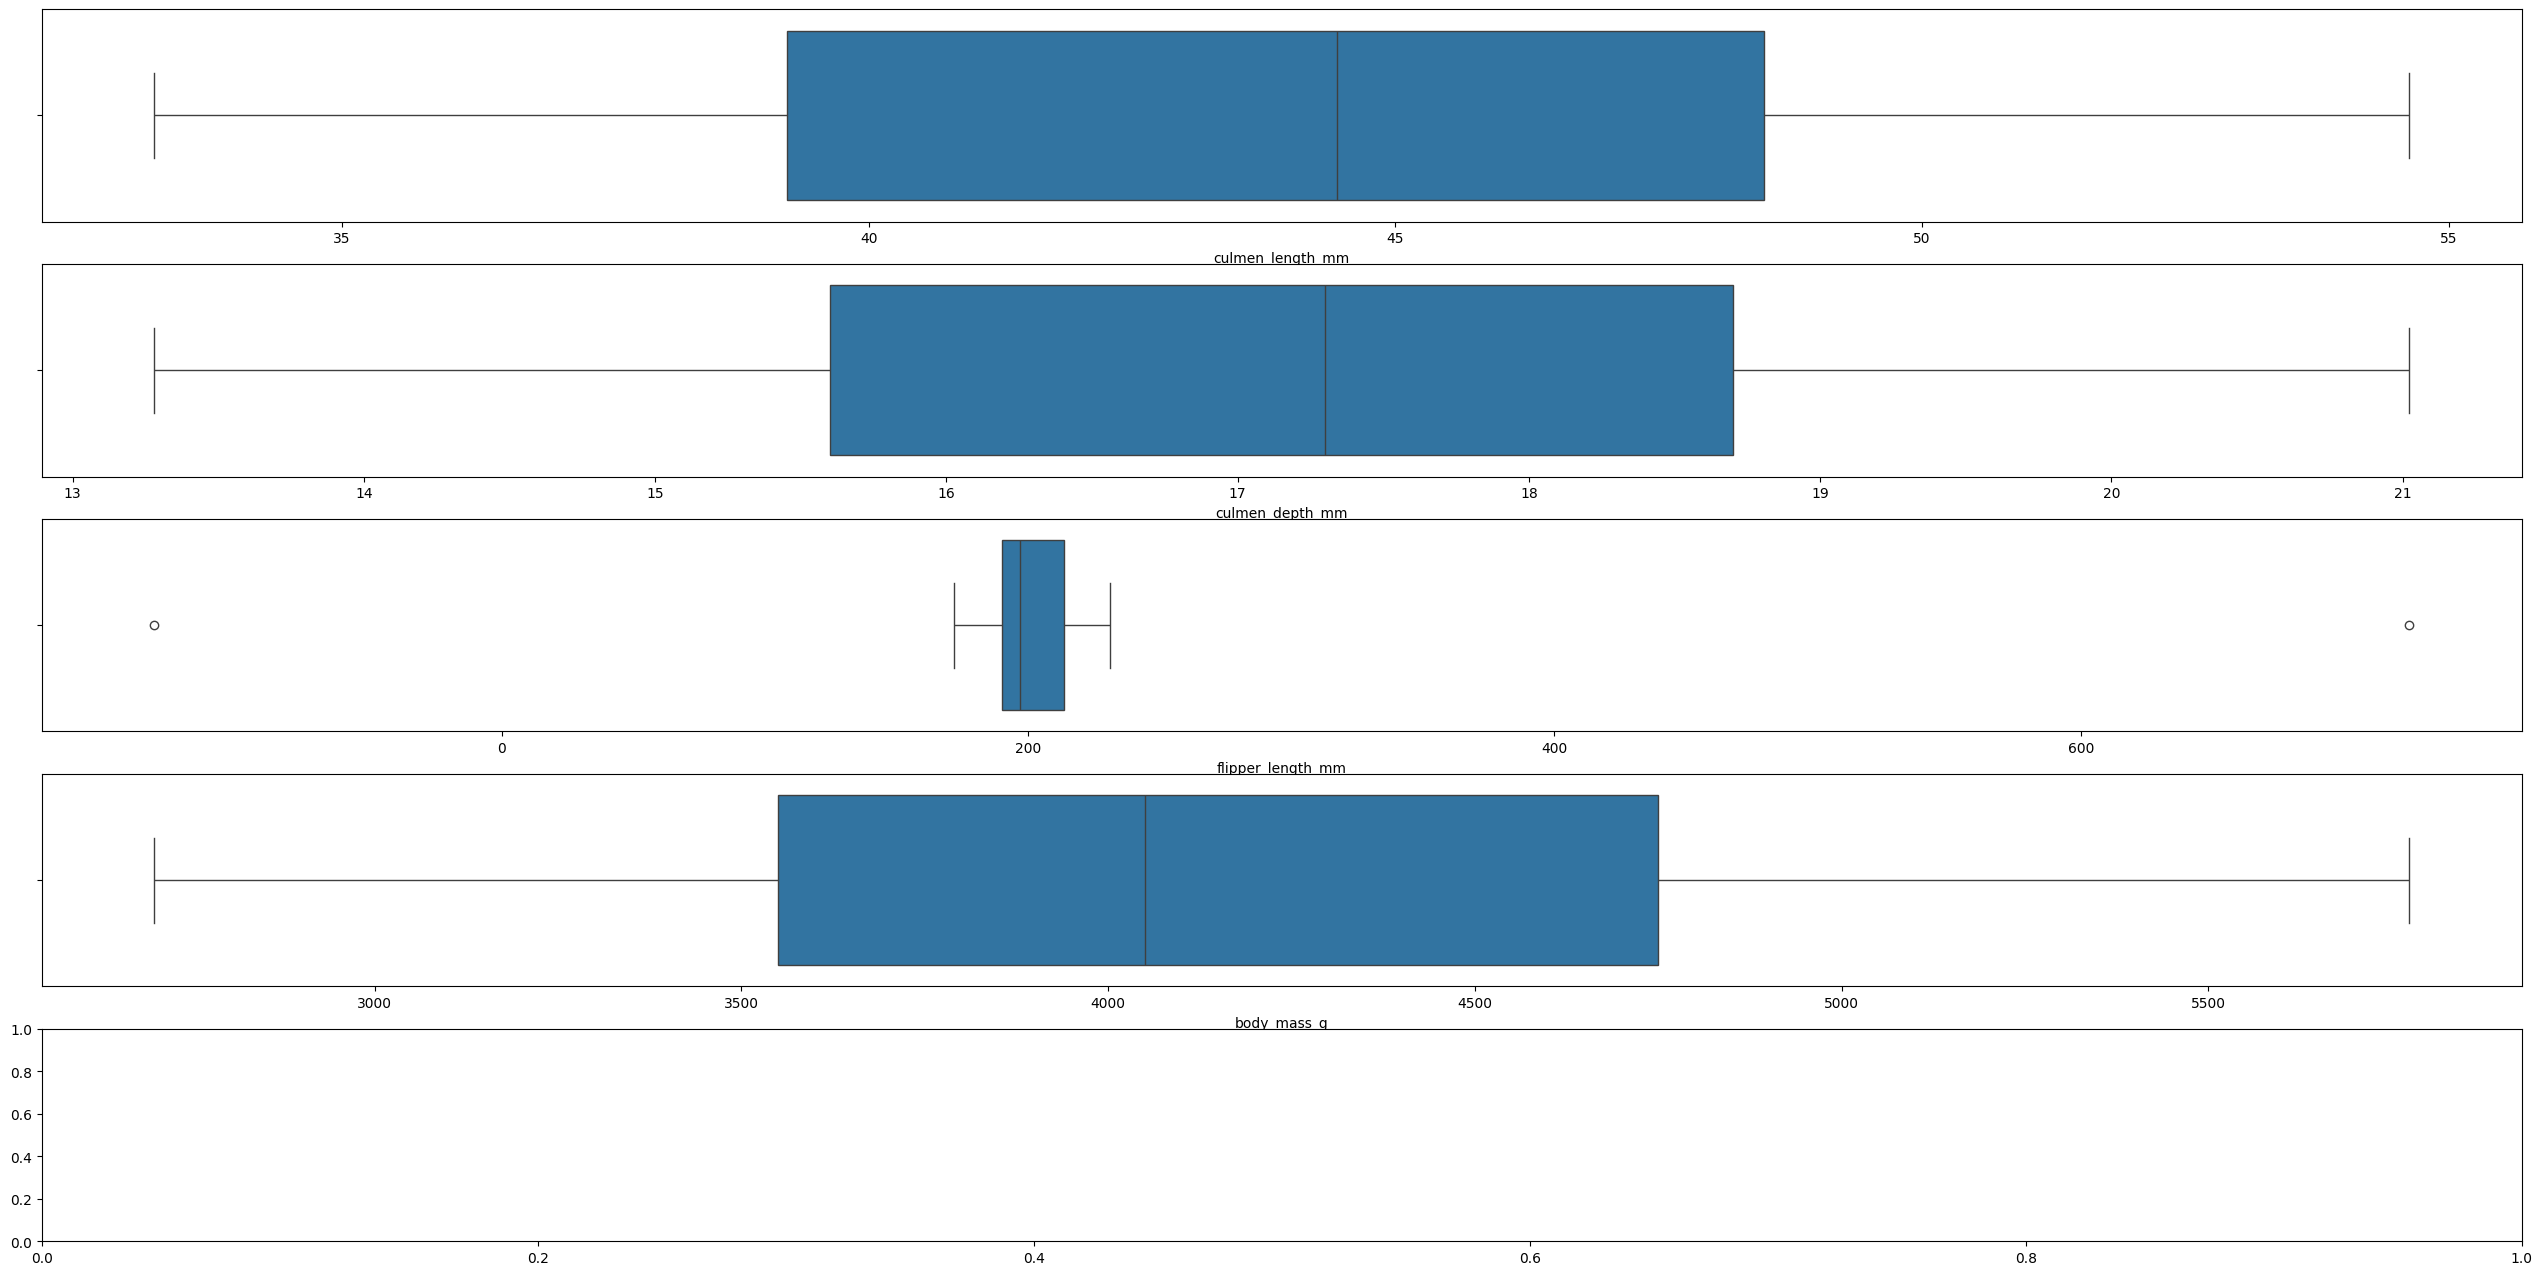

In [29]:
from scipy import stats

def replace_outliers(df: pd.DataFrame, threshold:float = 1.96):

    '''threshold = 1.96 for 95% of data 3 for 99.7%'''

    for col in df.select_dtypes(include=['number']).columns.tolist():
        z_scores = stats.zscore(df_num[col], nan_policy='omit')

        # Вычисляем границы интервала
        upper_bound = df[col].mean() + threshold * df[col].std()
        lower_bound = df[col].mean() - threshold * df[col].std()

        # Замена выбросов на границы интервала
        df.loc[z_scores > threshold, col] = upper_bound
        df.loc[z_scores < -threshold, col] = lower_bound


    return df.copy()


df = replace_outliers(df, 1.96)

df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.boxplot(data=df_num, x=col, ax=axes[idx % 5])


In [30]:
for col in df.select_dtypes(include=['number']).columns.to_list():
    df[col] = df[col].fillna(df[col].median())

In [31]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [32]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['number']).columns.to_list()
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

In [33]:
print(df['sex'].value_counts())

df['sex'] = df['sex'].replace('.', 'MALE')

df = pd.get_dummies(df, columns=['sex'], drop_first=True)


sex
MALE      178
FEMALE    165
.           1
Name: count, dtype: int64


In [34]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.895977,0.791661,-0.564941,-0.566187,True
1,-0.821247,0.127822,-0.427067,-0.502624,False
2,-0.671787,0.434209,-0.178893,-1.201815,False
3,0.103538,0.076757,-0.123743,-0.184810,True
4,-1.344357,1.098047,-0.234043,-0.947564,False
...,...,...,...,...,...
339,0.103538,0.076757,-0.123743,-0.184810,True
340,0.542577,-1.455178,0.372605,0.832194,False
341,1.215149,-0.740275,0.565629,1.976324,True
342,0.243657,-1.199855,0.289880,1.277134,False


In [35]:
df['sex_MALE'] = df['sex_MALE'].astype('int32')

In [36]:
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()
df_num = df[numeric_cols]

<Axes: >

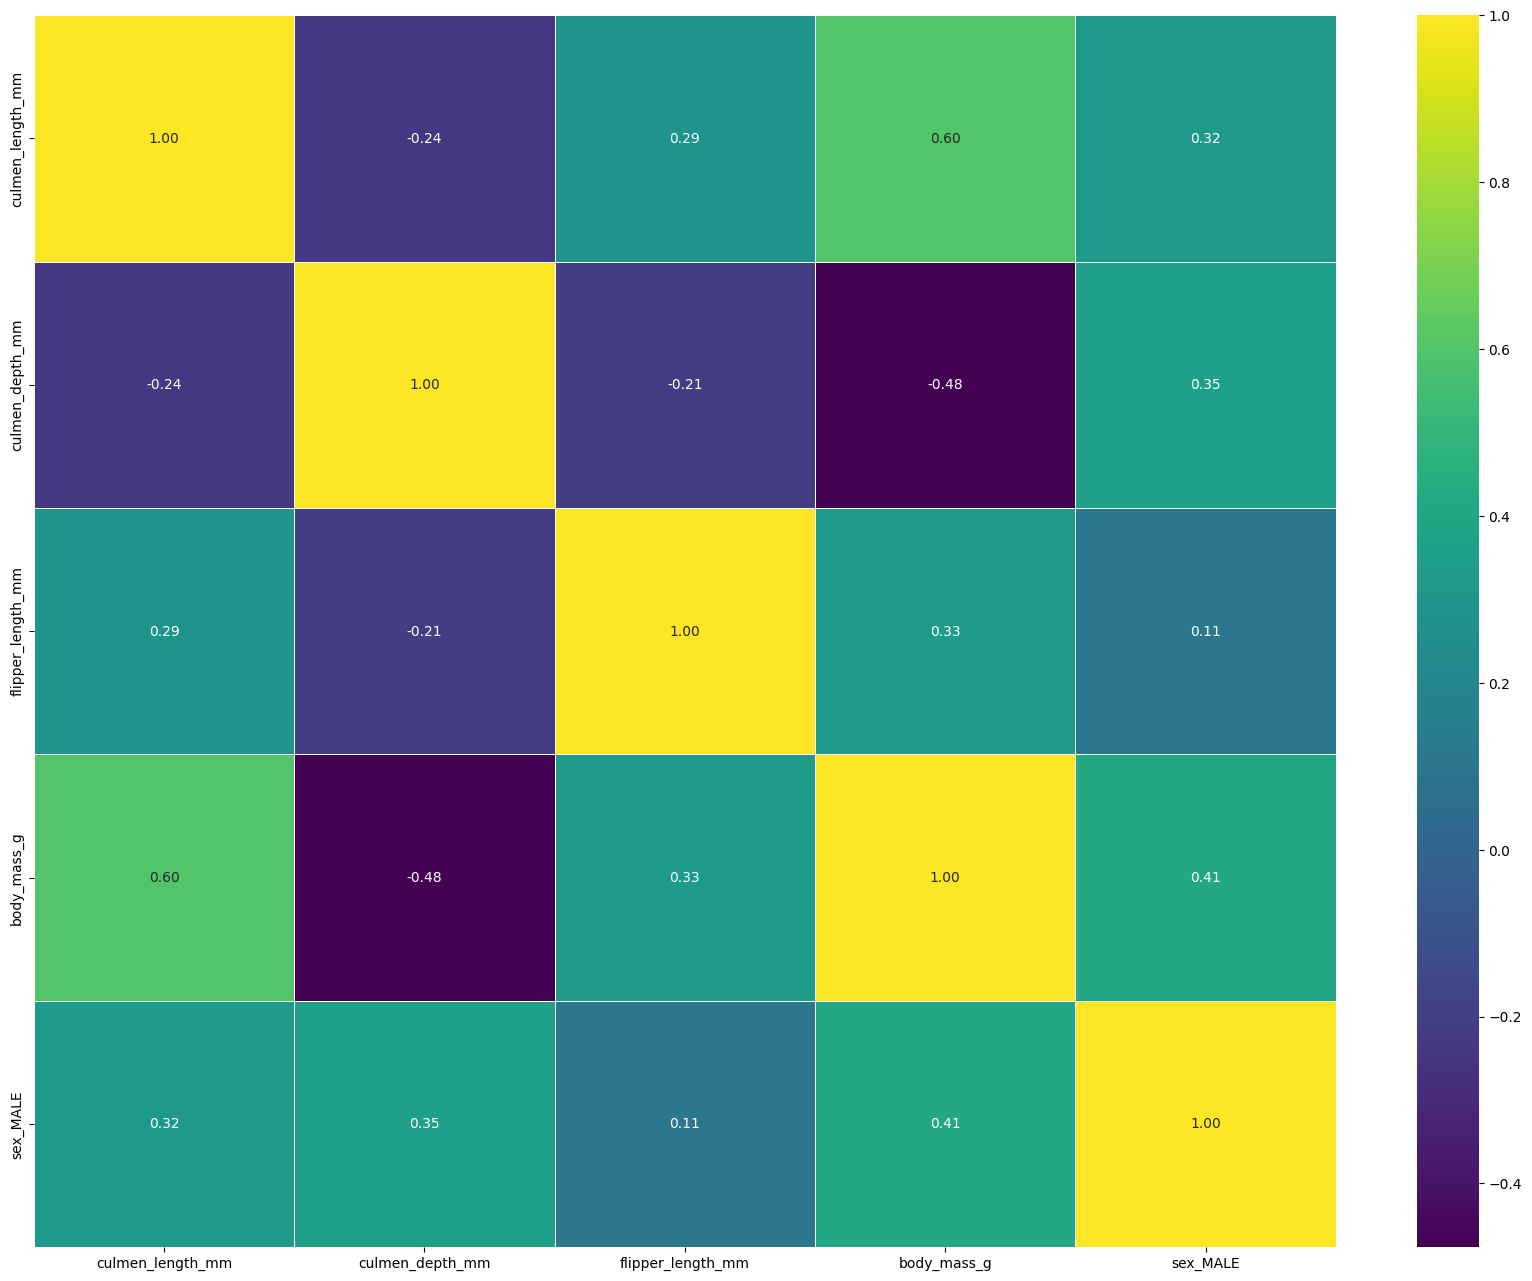

In [37]:
#Корреляция признаков между собой
plt.figure(figsize=(21, 16))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

([<matplotlib.axis.XTick at 0x16a38699490>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

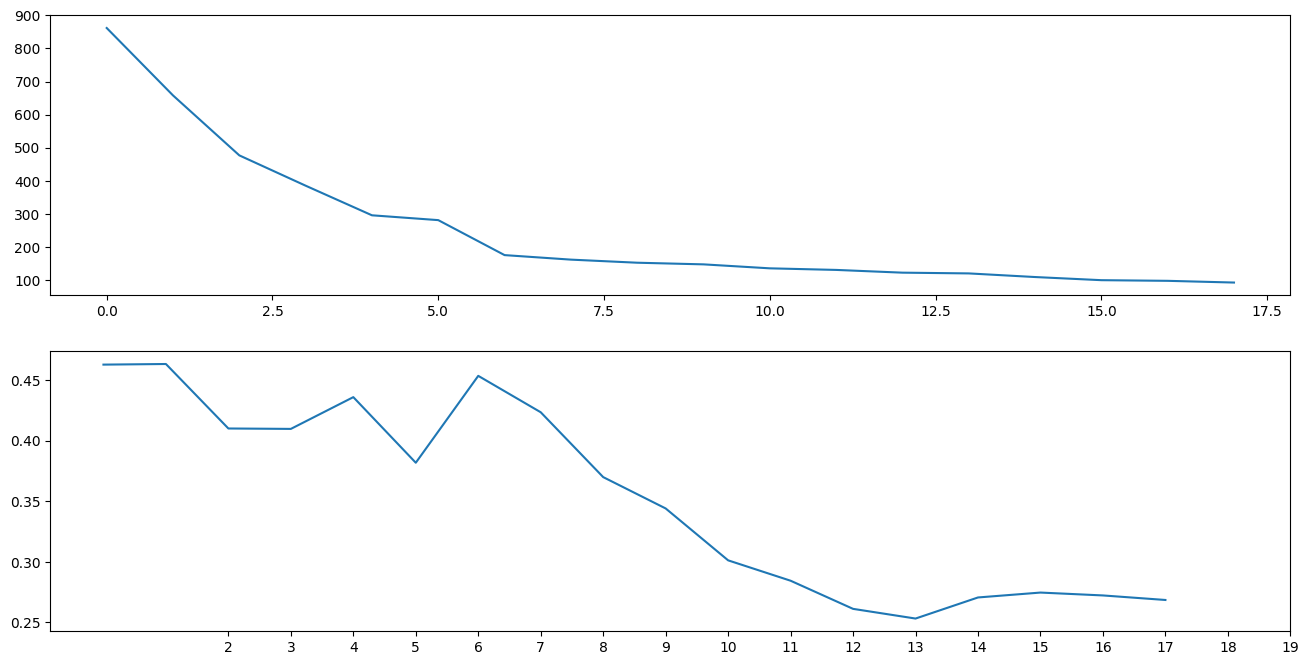

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
sil_score = []

k_range = range(2, 20)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42) 
    kmeans.fit(df)
    sse.append(kmeans.inertia_) #inertia это внутриклассова дисперсия
    sil_score.append(silhouette_score(df, kmeans.labels_))


fig, axes = plt.subplots(2, 1, figsize=(16, 8))

#Строим графики для внутрикластерной дисперсии и метрики силуэта
sns.lineplot(sse, ax=axes[0])
sns.lineplot(sil_score, ax=axes[1])
plt.xticks(ticks=k_range)

по методу локтя оптимальное количество кластеров - 6, По графику силуэта оптимальное количество кластеров так же равно 6 (Метрика силуэта 0,45)

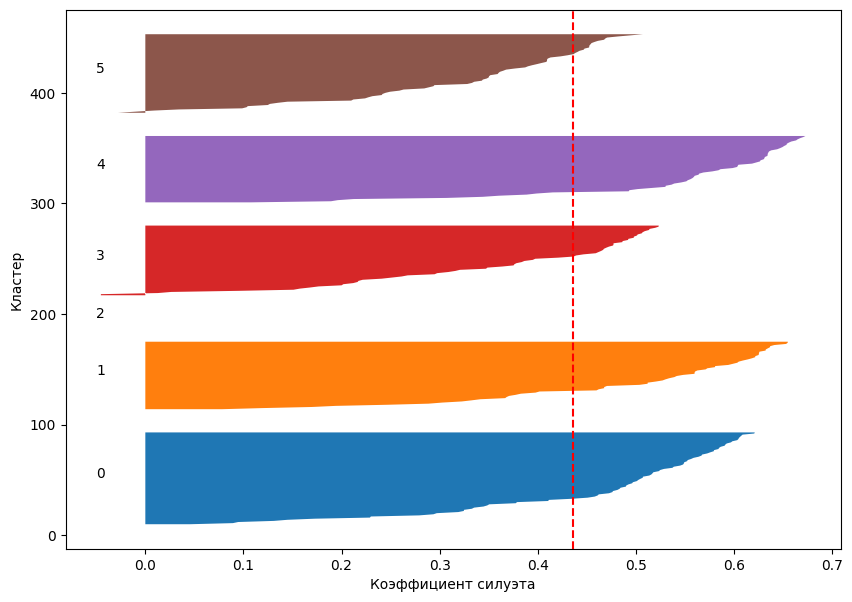

In [39]:
#построим силуэтную диаграмму
from sklearn.metrics import silhouette_samples

CLUSTERS = 6

kmeans = KMeans(n_clusters=CLUSTERS, random_state=42)
labels = kmeans.fit_predict(df)

# Вычисление силуэтных коэффициентов для каждого объекта
silhouette_vals = silhouette_samples(df, labels)

y_ticks = []
lower = 10

plt.figure(figsize=(10, 7))

for i in range(CLUSTERS):
    # Силуэтные коэффициенты для текущего кластера
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    
    upper = lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(lower, upper), 0, cluster_silhouette_vals)
    
    # Добавление метки для кластера
    plt.text(-0.05, lower + 0.5 * len(cluster_silhouette_vals), str(i))
    lower = upper + 20

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.xlabel("Коэффициент силуэта")
plt.ylabel("Кластер")
plt.show()


кластеризация в 5 кластере не очень (много точек ниже среднего). В Остальных кластеризация хорошая

d:\projects\ml algorithms\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


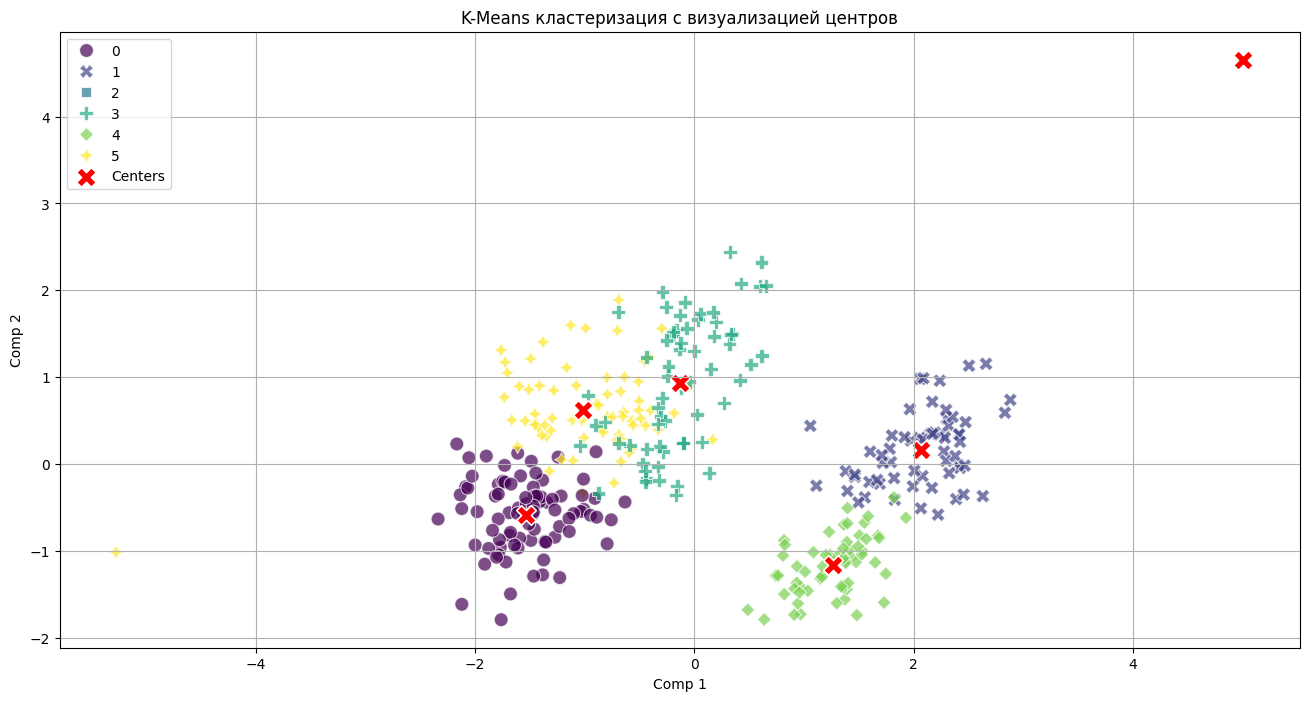

In [40]:
#Визуализируем центры кластеров
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=CLUSTERS, random_state=42)
kmeans.fit(df)

# Получение центров кластеров
centers = kmeans.cluster_centers_
labels = kmeans.labels_

pca = PCA(n_components=2)
x_pca = pca.fit_transform(df)
centers_pca = pca.transform(centers)

plt.figure(figsize=(16, 8))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='viridis', style=labels, s=100, alpha=0.7)
sns.scatterplot(x=centers_pca[:, 0], y=centers_pca[:, 1], color='red', marker='X', s=200, label='Centers')

plt.xlabel('Comp 1')
plt.ylabel('Comp 2')
plt.title('K-Means кластеризация с визуализацией центров')
plt.grid(True)

plt.show()

In [41]:
#Сохраняем модель в файл
import joblib
from datetime import datetime

joblib.dump(kmeans, f'clustering_kmeans_{CLUSTERS}clusters_v1_{datetime.now().strftime("%d%m%y")}.joblib')


['clustering_kmeans_6clusters_v1_230325.joblib']

In [52]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.895977,0.791661,-0.564941,-0.566187,1
1,-0.821247,0.127822,-0.427067,-0.502624,0
2,-0.671787,0.434209,-0.178893,-1.201815,0
3,0.103538,0.076757,-0.123743,-0.184810,1
4,-1.344357,1.098047,-0.234043,-0.947564,0
...,...,...,...,...,...
339,0.103538,0.076757,-0.123743,-0.184810,1
340,0.542577,-1.455178,0.372605,0.832194,0
341,1.215149,-0.740275,0.565629,1.976324,1
342,0.243657,-1.199855,0.289880,1.277134,0


In [66]:
from sklearn.cluster import AgglomerativeClustering
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

space = {
    'n_clusters': hp.choice('n_clusters', [2, 3, 4, 5, 6]),
    'linkage': hp.choice('linkage', ['ward', 'complete', 'average', 'single'])
}

X = df.copy()

def objective(params):
    n_clusters = int(params['n_clusters'])
    linkage = params['linkage']
    
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    model.fit(X)
    labels = model.labels_

    score = silhouette_score(X, labels)
    
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:00<00:00, 162.38trial/s, best loss: -0.8316866966141837]


In [59]:
best_params = {
    'n_clusters': [2, 3, 4, 5, 6][best['n_clusters']],
    'linkage': ['ward', 'complete', 'average', 'single'][best['linkage']]
}

print("Best parameters found:", best_params)

final_model = AgglomerativeClustering(n_clusters=best_params['n_clusters'], 
                                      linkage=best_params['linkage'])

final_model.fit(X)
labels = final_model.labels_


Best parameters found: {'n_clusters': 2, 'linkage': 'single'}


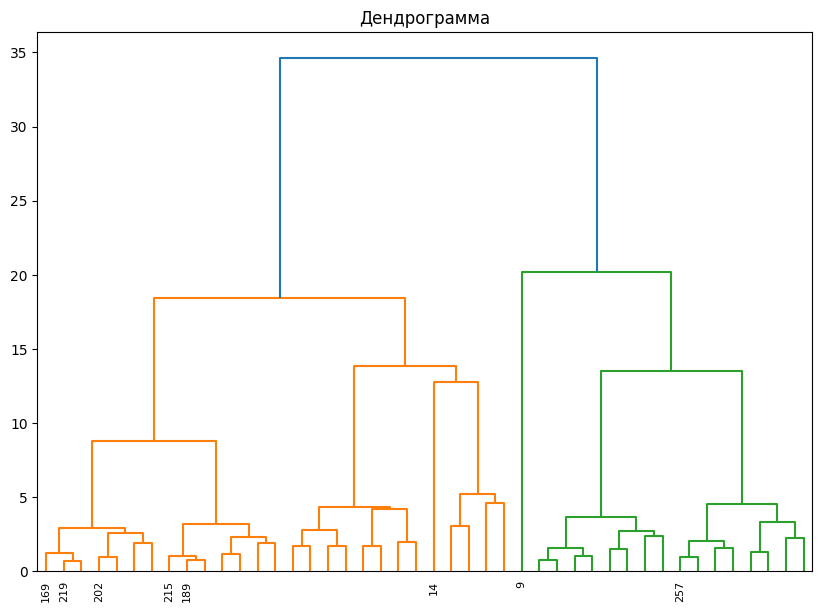

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward', metric='euclidean')

# Построение дендрограммы с дополнительными настройками
plt.figure(figsize=(10, 7))
dendrogram(Z, 
           truncate_mode='level',  # Ограничиваем количество уровней
           p=5,                    # Уровень обрезания
           show_leaf_counts=False, # Не показываем количество листьев
          )
plt.title('Дендрограмма')
plt.show()

In [83]:
X=df.drop(columns=['sex_MALE'])

model = AgglomerativeClustering(n_clusters=2, linkage='average', metric='manhattan')

model.fit(X)

AgglomerativeClustering(linkage='average', metric='manhattan')

In [84]:
from sklearn.metrics import adjusted_rand_score

#Оцениваем качество модели

y_pred = model.labels_
adjusted_score = adjusted_rand_score(df['sex_MALE'], y_pred)
print(f'Adjusted Rand Score: {adjusted_score:.4f}')

silhouette = silhouette_score(X, y_pred)
print(f'Silhouete Score: {silhouette:.4f}')

Adjusted Rand Score: -0.0005
Silhouete Score: 0.8394


Метрика силуэта 0,8394 достаточно высокая и означает хорошее качество кластеризации, а метрика Adjusted Rand Score околонулевая что обзначает на то что разбивка по кластерам почти случайна. 

In [95]:
from sklearn.cluster import DBSCAN

space = {
    'eps': hp.uniform('eps', 0.05, 0.5),
    'min_samples': hp.quniform('min_samples', 2, 20, 1)
}

X = df.copy().drop(columns=['sex_MALE'])

def objective(params):
    eps = params['eps']
    min_samples = int(params['min_samples'])
    
    model = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')

    model.fit(X)
    labels = model.labels_

    if len(set(labels)) < 2:
        # Если все точки считаются шумом или есть только один кластер, возвращаем низкое значение
        silhouette = -1
    else:
        silhouette = silhouette_score(X, labels)
    
    return {'loss': -silhouette, 'status': STATUS_OK}

trials = Trials()

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:00<00:00, 112.48trial/s, best loss: -0.4111787974834442]


In [96]:
best_params = {
    'eps': best['eps'],
    'min_samples': int(best['min_samples'])
}

print("Best parameters found:", best_params)

# Обучаем финальную модель с лучшими параметрами
final_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'], metric='euclidean')
final_model.fit(X)
y_pred = final_model.labels_

Best parameters found: {'eps': np.float64(0.499880675068078), 'min_samples': 4}


In [ ]:
y_pred = model.labels_
adjusted_score = adjusted_rand_score(df['sex_MALE'], y_pred)
print(f'Adjusted Rand Score: {adjusted_score:.4f}')

silhouette = silhouette_score(X, y_pred)
print(f'Silhouete Score: {silhouette:.4f}')

Adjusted Rand Score: -0.0005
Silhouete Score: 0.8394


Модель DBSCAN показывает аналогичные метрики что и AgglomerativeClustering на текущих данных